This is the **Lysozome-Water** example for **GROMACS** from [mdtutorials.com](http://www.mdtutorials.com/gmx/lysozyme/01_pdb2gmx.html)

In [1]:
# run to see different options available
#!gmx help

## Step 1: Generate Topology

Here similar to the tutorial I am using the hen egg white lysozome [1AKI](https://www.rcsb.org/structure/1aki)

Let's open the pdb file in VMD
<p align="center">
<img src="./1aki-with-water.png" width="400" height="200">
</p>
MY settings are:
* Graphics --> colors --> Display --> Background --> White
* Display --> Perspective, Light 0, Light 1, Light 3, axes off
* Graphics --> Representations --> Create Rep and then for one I used (Style: NewCartoon----Color: ResName----Selection: all) and (Style: CPK----Color: Type----Selection: water) 

We need to now remove the crystal waters from our pdb file.

In [5]:
!grep -v HOH 1aki.pdb > 1AKI_clean.pdb

This is how our pdb looks now.
<p align="center">
<img src="./1aki_clean.png" width="300" height="150">
</p>
So, we removed the water molecules from our structure. Check the pdb file for any missing atoms in any amino acid residues as they will cause _pdb2mgx_ to fail. Now the pdb file is ready to be put in to the GROMACS module **pdb2mgx**.The purpose of _pdb2mgx_ is to generate three files:
* The topology for the molecule (topol.top ---- it contains all necessary information for a simulation, including, atom types and charges (non-bonded parameters) as well as bonds,angles, and dihedrals (bonded parameters).
* A position restraint file
* A post-processed structure file

In [15]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

We need to select a force field to create the topology file. These are the option:

 1: AMBER03 protein, nucleic AMBER94 (Duan et al., J. Comp. Chem. 24, 1999-2012, 2003)

 2: AMBER94 force field (Cornell et al., JACS 117, 5179-5197, 1995)

 3: AMBER96 protein, nucleic AMBER94 (Kollman et al., Acc. Chem. Res. 29, 461-469, 1996)

 4: AMBER99 protein, nucleic AMBER94 (Wang et al., J. Comp. Chem. 21, 1049-1074, 2000)

 5: AMBER99SB protein, nucleic AMBER94 (Hornak et al., Proteins 65, 712-725, 2006)

 6: AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)

 7: AMBERGS force field (Garcia & Sanbonmatsu, PNAS 99, 2782-2787, 2002)

 8: CHARMM27 all-atom force field (CHARM22 plus CMAP for proteins)

 9: GROMOS96 43a1 force field

10: GROMOS96 43a2 force field (improved alkane dihedrals)

11: GROMOS96 45a3 force field (Schuler JCC 2001 22 1205)

12: GROMOS96 53a5 force field (JCC 2004 vol 25 pag 1656)

13: GROMOS96 53a6 force field (JCC 2004 vol 25 pag 1656)

14: GROMOS96 54a7 force field (Eur. Biophys. J. (2011), 40,, 843-856, DOI: 10.1007/s00249-011-0700-9)

15: OPLS-AA/L all-atom force field (2001 aminoacid dihedrals)

We will use the OPLS-AA forcefield and hence will select option 15

In [18]:
# Execute pdb2mgx by this (we use the SPC/E model for water and it can well be replaced with SPC, TIP3P, TIP4P, etc.)
!printf "15" | gmx pdb2gmx -f 1AKI_clean.pdb -o 1AKI_processed.gro -water spce

               :-) GROMACS - gmx pdb2gmx, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx pdb2gmx -f 1AKI_clean.pdb -o 1AKI_processed.gro -water spce

Select the Force Field:

From '/Users/arnab/opt/anaconda3/envs/molecularDynamics/share/gromacs/top':

 1: AMBER03 protein, nucleic AMBER94 (Duan et al., J. Comp. Chem. 24, 1999-2012, 2003)

 2: AMBER94 force field (Cornell et al., JACS 117, 5179-5197, 1995)

 3: AMBER96 protein, nucleic AMBER94 (Kollman et al., Acc. Chem. Res. 29, 461-469, 1996)

 4: AMBER99 protein, nucleic AMBER94 (Wang et al., J. Comp. Chem. 21, 1049-1074, 2000)

 5: AMBER99SB protein, nucleic AMBER94 (Hornak et al., Proteins 65, 712-725, 2006)

 6: AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)

 7: AMBERGS

The _pdb2mgx_ module can also be provided with occasional flags such as "-ignh", "-ter", "-inter", etc. but we don't need to worry about them here.

In [20]:
!ls

1AKI_clean.pdb      1aki.pdb            Untitled.ipynb
1AKI_processed.gro  1aki_clean          posre.itp
1aki-with-water.png 1aki_clean.png      topol.top


We have now generated three files:

* **1AKI_processed.gro** is a GROMACS-formatted structure file that contains all the atoms defined within the force field (i.e. H atoms are added to the amino acids in the protein) 
* **topol.top** is a topology file 
* **posre.itp** contains information used to restrain the positions of heavy atoms. In other words, it contains a force constant used to keep atoms in place during equilibration.

## Step 2:  Define Box and Solvate

There are two parts associated with this step:
* Define the box dimensions using <span style="color:blue">_editconf_</span> module
* Fill the box with solvents (water in our case) using the <span style="color:blue">_solvate_</span> module

In [22]:
## first define the box
!gmx editconf -f 1AKI_processed.gro -o 1AKI_newbox.gro -c -d 1.0 -bt cubic

               :-) GROMACS - gmx editconf, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx editconf -f 1AKI_processed.gro -o 1AKI_newbox.gro -c -d 1.0 -bt cubic

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 1960 atoms
Volume: 123.376 nm^3, corresponds to roughly 55500 electrons
No velocities found
    system size :  3.817  4.234  3.454 (nm)
    diameter    :  5.010               (nm)
    center      :  2.781  2.488  0.017 (nm)
    box vectors :  5.906  6.845  3.052 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  : 123.38               (nm^3)
    shift       :  0.724  1.017  3.488 (nm)
new center      :  3.505  3.505  3.505 (nm)
new box vectors :  7.010  7.010  7.010 (nm)
new box angles  :  90.00 

- "<span style="color:blue">**-c**</span>" centers the protein
- "<span style="color:blue">**-d 1.0**</span>" places the protein atleast 1.0 nm from the box edge
- "<span style="color:blue">**-bt cubic**</span>" box type is cubic

Now that we have created our empty box, we will fill it with our solvent water using the **solvate** command

In [23]:
!gmx solvate -cp 1AKI_newbox.gro -cs spc216.gro -o 1AKI_solv.gro -p topol.top

               :-) GROMACS - gmx solvate, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx solvate -cp 1AKI_newbox.gro -cs spc216.gro -o 1AKI_solv.gro -p topol.top

Reading solute configuration
Reading solvent configuration

Initialising inter-atomic distances...

         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary. Note, that this functionality may
         be removed in a future GROMACS version. Please, consider
         using another file format for your input.

NOTE: From version 5.0 gmx solvate uses the Van der Waals radii
from the sou

- "<span style="color:blue">**-cp**</span>" configuration of the protein is in the output of the previous step
- "<span style="color:blue">**-cs**</span>" configuration of the solvent is taken from the **spc216.gro** file \[this can also be used with **SPC**, **SPC/E** (used in the current example), and **TIP3P** as all of them are three-point water models\]


## Step 3: Adding Ions

Now, let's look at the last line of the **\[atoms\]** directive in the **topol.top** file
<img src="./charge-on-protein.png" width="600" height="30">

If we now look at the marked line 2117, we see that our protein has a net charge of +8 ("**qtot 8**"). We now have to neutralize it by adding ions and the module to do that in GROMACS is called <span style="color:blue">_genion_</span>. It reads through a run input file (**\*.tpr**) generated by GROMACS <span style="color:blue">_grompp_</span> module. This **\*.tpr** file will also be needed later when we run our first simulation. To create the **\*.tpr** file, we need another file with the extension **\*.mdp** (molecular dynamics parameter file; also need to later for energy minimization)

### Create a *.mdp file with the content

; ions.mdp - used as input into grompp to generate ions.tpr

; Parameters describing what to do, when to stop and what to save

integrator  = steep         ; Algorithm (steep = steepest descent minimization)

emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm

emstep      = 0.01          ; Minimization step size

nsteps      = 50000         ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions

nstlist         = 1         ; Frequency to update the neighbor list and long range forces

cutoff-scheme   = Verlet    ; Buffered neighbor searching 

ns_type         = grid      ; Method to determine neighbor list (simple, grid)

coulombtype     = cutoff    ; Treatment of long range electrostatic interactions

rcoulomb        = 1.0       ; Short-range electrostatic cut-off

rvdw            = 1.0       ; Short-range Van der Waals cut-off

pbc             = xyz       ; Periodic Boundary Conditions in all 3 dimensions

In [30]:
## create the *.mdp file

f = open("ions.mdp", "w")
f.write("; ions.mdp - used as input into grompp to generate ions.tpr\n")
f.write("; Parameters describing what to do, when to stop and what to save\n")
f.write("integrator  = steep         ; Algorithm (steep = steepest descent minimization)\n")
f.write("emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm\n")
f.write("emstep      = 0.01          ; Minimization step size\n")
f.write("nsteps      = 50000         ; Maximum number of (minimization) steps to perform\n")
f.write("\n")
f.write("; Parameters describing how to find the neighbors of each atom and how to calculate the interactions\n")
f.write("nstlist         = 1         ; Frequency to update the neighbor list and long range forces\n")
f.write("cutoff-scheme   = Verlet    ; Buffered neighbor searching\n")
f.write("ns_type        = grid      ; Method to determine neighbor list (simple, grid)\n")
f.write("coulombtype     = cutoff    ; Treatment of long range electrostatic interactions\n")
f.write("rcoulomb        = 1.0       ; Short-range electrostatic cut-off\n")
f.write("rvdw            = 1.0       ; Short-range Van der Waals cut-off\n")
f.write("pbc             = xyz       ; Periodic Boundary Conditions in all 3 dimensions\n")
f.close()

In [32]:
!cat ions.mdp

; ions.mdp - used as input into grompp to generate ions.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep         ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01          ; Minimization step size
nsteps      = 50000         ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 1         ; Frequency to update the neighbor list and long range forces
cutoff-scheme   = Verlet    ; Buffered neighbor searching
ns_type        = grid      ; Method to determine neighbor list (simple, grid)
coulombtype     = cutoff    ; Treatment of long range electrostatic interactions
rcoulomb        = 1.0       ; Short-range electrostatic cut-off
rvdw            = 1.0       ; Short-range Van der Waals cut-off
pbc             = xyz       ; Peri

In [33]:
## Now we assemble the *.tpr file in this way
!gmx grompp -f ions.mdp -c 1AKI_solv.gro -p topol.top -o ions.tpr

                :-) GROMACS - gmx grompp, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx grompp -f ions.mdp -c 1AKI_solv.gro -p topol.top -o ions.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ions.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Setting the LD random seed to -135364673

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 2 bonded neighbours molecule type 'SOL'

NOTE 2 [file topol.top, line 18409]:
  System has non-zero total charge: 8.00000

Now that we have generated the atomic level description of our system in the binary file **ions.tpr**, we pass it to **_genion_**

In [36]:
!printf "13" | gmx genion -s ions.tpr -o 1AKI_solv_ions.gro -p topol.top -pname NA -nname CL -neutral

                :-) GROMACS - gmx genion, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx genion -s ions.tpr -o 1AKI_solv_ions.gro -p topol.top -pname NA -nname CL -neutral

Reading file ions.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file ions.tpr, VERSION 2022.4-conda_forge (single precision)
Will try to add 0 NA ions and 8 CL ions.
Select a continuous group of solvent molecules
Group     0 (         System) has 33892 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 elements
Group     6 (   MainChain+Cb) has   634 elements
Group     7 (    MainChain+H) has   64

- "<span style="color:blue">**-s**</span>" structure or state file as input
- "<span style="color:blue">**-o**</span>" output .gro file
- "<span style="color:blue">**-p**</span>" process the topology file to reflect the removal of water molecules and addition of ions
- "<span style="color:blue">**-pname**</span>" define positive ion name
- "<span style="color:blue">**-nname**</span>" define negative ion name
- "<span style="color:blue">**-neutral**</span>" ask genion to only neutralize the protein that needs only 8 Cl atoms
- "<span style="color:blue">**-conc**</span>" can be used to specify a concentration

Now let's look at what we have now:

<img src="neutralized-solvated-protein.png" width="400" height="600">

The red spheres represents the Chlorine atoms we added to neutralize the system. 

## Step 4: Energy Minimization

This is performed to make sure that there are no steric clashes or inappropriate geometry in our system. Again, the **_grompp_** module of GROMACS will be used to assemble the structure, topology, and simulation parameters in a binary **\*.tpr** input file, but instead of passing the **\*.tpr** file to **_genion_**, we will run energy minimization through the GROMACS MD engine **_mdrun_**.

In [37]:
## Create another *.mdp file in the following way
f = open("minim.mdp", "w")
f.write("; minim.mdp - used as input into grompp to generate em.tpr\n")
f.write("; Parameters describing what to do, when to stop and what to save\n")
f.write("integrator  = steep         ; Algorithm (steep = steepest descent minimization)\n")
f.write("emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm\n")
f.write("emstep      = 0.01          ; Minimization step size\n")
f.write("nsteps      = 50000         ; Maximum number of (minimization) steps to perform\n")
f.write("\n")
f.write("; Parameters describing how to find the neighbors of each atom and how to calculate the interactions\n")
f.write("nstlist         = 1         ; Frequency to update the neighbor list and long range forces\n")
f.write("cutoff-scheme   = Verlet    ; Buffered neighbor searching\n")
f.write("ns_type         = grid      ; Method to determine neighbor list (simple, grid)\n")
f.write("coulombtype     = PME       ; Treatment of long range electrostatic interactions\n")
f.write("rcoulomb        = 1.0       ; Short-range electrostatic cut-off\n")
f.write("rvdw            = 1.0       ; Short-range Van der Waals cut-off\n")
f.write("pbc             = xyz       ; Periodic Boundary Conditions in all 3 dimensions\n")
f.close()

In [40]:
## Assemble the binary input using grompp
!gmx grompp -f minim.mdp -c 1AKI_solv_ions.gro -p topol.top -o em.tpr

                :-) GROMACS - gmx grompp, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx grompp -f minim.mdp -c 1AKI_solv_ions.gro -p topol.top -o em.tpr

Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file minim.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.

Setting the LD random seed to -118685713

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

Excluding 2 bonded neighbours molecule type 'SOL'

Excluding 1 bonded neighbours molecule type 'CL'
Analysing residue names:
T

In [43]:
## Let's run the MD calculation
!gmx mdrun -v -deffnm em

                :-) GROMACS - gmx mdrun, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx mdrun -v -deffnm em


Back Off! I just backed up em.log to ./#em.log.1#
Reading file em.tpr, VERSION 2022.4-conda_forge (single precision)
Using 1 MPI thread
Using 8 OpenMP threads 


Back Off! I just backed up em.trr to ./#em.trr.1#

Back Off! I just backed up em.edr to ./#em.edr.1#

Steepest Descents:
   Tolerance (Fmax)   =  1.00000e+03
   Number of steps    =        50000
Step=    0, Dmax= 1.0e-02 nm, Epot= -3.32499e+05 Fmax= 2.28200e+05, atom= 1905
Step=    1, Dmax= 1.0e-02 nm, Epot= -3.48573e+05 Fmax= 8.64872e+04, atom= 19892
Step=    2, Dmax= 1.2e-02 nm, Epot= -3.70914e+05 Fmax= 3.30423e+04, atom= 19892
Step=    3, Dmax= 1.4e-02 nm, Epot= -3.99316e+05 Fmax= 1.32140e+04, atom= 

Step=  251, Dmax= 1.1e-02 nm, Epot= -5.63718e+05 Fmax= 2.19274e+03, atom= 736
Step=  252, Dmax= 1.3e-02 nm, Epot= -5.63789e+05 Fmax= 1.72312e+04, atom= 736
Step=  253, Dmax= 1.5e-02 nm, Epot= -5.64082e+05 Fmax= 6.28787e+03, atom= 736
Step=  255, Dmax= 9.1e-03 nm, Epot= -5.64148e+05 Fmax= 7.76486e+03, atom= 736
Step=  256, Dmax= 1.1e-02 nm, Epot= -5.64209e+05 Fmax= 9.18746e+03, atom= 736
Step=  257, Dmax= 1.3e-02 nm, Epot= -5.64258e+05 Fmax= 1.10548e+04, atom= 736
Step=  258, Dmax= 1.6e-02 nm, Epot= -5.64292e+05 Fmax= 1.33184e+04, atom= 736
Step=  259, Dmax= 1.9e-02 nm, Epot= -5.64309e+05 Fmax= 1.58091e+04, atom= 736
Step=  261, Dmax= 1.1e-02 nm, Epot= -5.64571e+05 Fmax= 1.70811e+03, atom= 736
Step=  262, Dmax= 1.4e-02 nm, Epot= -5.64712e+05 Fmax= 1.91344e+04, atom= 736
Step=  263, Dmax= 1.6e-02 nm, Epot= -5.65043e+05 Fmax= 6.17585e+03, atom= 736
Step=  265, Dmax= 9.8e-03 nm, Epot= -5.65096e+05 Fmax= 8.93720e+03, atom= 736
Step=  266, Dmax= 1.2e-02 nm, Epot= -5.65164e+05 Fmax= 9.28299e+

Step=  385, Dmax= 9.7e-03 nm, Epot= -5.72645e+05 Fmax= 1.67154e+03, atom= 736
Step=  386, Dmax= 1.2e-02 nm, Epot= -5.72755e+05 Fmax= 1.61995e+04, atom= 736
Step=  387, Dmax= 1.4e-02 nm, Epot= -5.72914e+05 Fmax= 5.46085e+03, atom= 736
Step=  389, Dmax= 8.4e-03 nm, Epot= -5.72954e+05 Fmax= 7.48642e+03, atom= 736
Step=  390, Dmax= 1.0e-02 nm, Epot= -5.72997e+05 Fmax= 8.11918e+03, atom= 736
Step=  391, Dmax= 1.2e-02 nm, Epot= -5.73024e+05 Fmax= 1.05272e+04, atom= 736
Step=  392, Dmax= 1.5e-02 nm, Epot= -5.73057e+05 Fmax= 1.19123e+04, atom= 736
Step=  393, Dmax= 1.7e-02 nm, Epot= -5.73063e+05 Fmax= 1.49220e+04, atom= 736
Step=  394, Dmax= 2.1e-02 nm, Epot= -5.73070e+05 Fmax= 1.73191e+04, atom= 736
Step=  396, Dmax= 1.3e-02 nm, Epot= -5.73258e+05 Fmax= 2.02116e+03, atom= 736
Step=  397, Dmax= 1.5e-02 nm, Epot= -5.73270e+05 Fmax= 2.15004e+04, atom= 736
Step=  398, Dmax= 1.8e-02 nm, Epot= -5.73526e+05 Fmax= 6.49716e+03, atom= 736
Step=  400, Dmax= 1.1e-02 nm, Epot= -5.73550e+05 Fmax= 1.02802e+

Step=  519, Dmax= 9.0e-03 nm, Epot= -5.78913e+05 Fmax= 4.62921e+03, atom= 736
Step=  521, Dmax= 5.4e-03 nm, Epot= -5.78946e+05 Fmax= 3.65074e+03, atom= 736
Step=  522, Dmax= 6.5e-03 nm, Epot= -5.78978e+05 Fmax= 6.34622e+03, atom= 736
Step=  523, Dmax= 7.8e-03 nm, Epot= -5.79012e+05 Fmax= 5.58608e+03, atom= 736
Step=  524, Dmax= 9.3e-03 nm, Epot= -5.79031e+05 Fmax= 8.78988e+03, atom= 736
Step=  525, Dmax= 1.1e-02 nm, Epot= -5.79066e+05 Fmax= 8.39435e+03, atom= 736
Step=  527, Dmax= 6.7e-03 nm, Epot= -5.79120e+05 Fmax= 1.94058e+03, atom= 736
Step=  528, Dmax= 8.0e-03 nm, Epot= -5.79170e+05 Fmax= 1.03700e+04, atom= 736
Step=  529, Dmax= 9.6e-03 nm, Epot= -5.79237e+05 Fmax= 4.51393e+03, atom= 736
Step=  531, Dmax= 5.8e-03 nm, Epot= -5.79269e+05 Fmax= 4.38449e+03, atom= 736
Step=  532, Dmax= 6.9e-03 nm, Epot= -5.79297e+05 Fmax= 6.35539e+03, atom= 736
Step=  533, Dmax= 8.3e-03 nm, Epot= -5.79328e+05 Fmax= 6.46875e+03, atom= 736
Step=  534, Dmax= 1.0e-02 nm, Epot= -5.79347e+05 Fmax= 8.97753e+

Step=  653, Dmax= 8.3e-03 nm, Epot= -5.82827e+05 Fmax= 8.08300e+03, atom= 736
Step=  654, Dmax= 9.9e-03 nm, Epot= -5.82857e+05 Fmax= 7.19639e+03, atom= 736
Step=  656, Dmax= 6.0e-03 nm, Epot= -5.82897e+05 Fmax= 1.98771e+03, atom= 736
Step=  657, Dmax= 7.1e-03 nm, Epot= -5.82928e+05 Fmax= 8.96734e+03, atom= 736
Step=  658, Dmax= 8.6e-03 nm, Epot= -5.82977e+05 Fmax= 4.25527e+03, atom= 736
Step=  660, Dmax= 5.1e-03 nm, Epot= -5.83002e+05 Fmax= 3.65319e+03, atom= 736
Step=  661, Dmax= 6.2e-03 nm, Epot= -5.83024e+05 Fmax= 5.88912e+03, atom= 736
Step=  662, Dmax= 7.4e-03 nm, Epot= -5.83050e+05 Fmax= 5.50711e+03, atom= 736
Step=  663, Dmax= 8.9e-03 nm, Epot= -5.83062e+05 Fmax= 8.21723e+03, atom= 736
Step=  664, Dmax= 1.1e-02 nm, Epot= -5.83086e+05 Fmax= 8.19560e+03, atom= 736
Step=  666, Dmax= 6.4e-03 nm, Epot= -5.83133e+05 Fmax= 1.67279e+03, atom= 736
Step=  667, Dmax= 7.7e-03 nm, Epot= -5.83170e+05 Fmax= 1.00825e+04, atom= 736
Step=  668, Dmax= 9.2e-03 nm, Epot= -5.83229e+05 Fmax= 4.13007e+

Now we need to make sure that the minimization makes sense.
* First, we check the Potential Energy: it should be negative and within $10^5-10^6$ range
* Then check that the target $F_{max}$ should be no greater than 1000 KJ mol$^{-1}$ nm$^{-1}$ as we set "emtol=1000.0" in the minim.mdp file.

The **em.edr** file contains all of the energy terms that is collected during energy minimization. The GROMACS **_energy_** module can analyze any **_.edr_** files. 

In [48]:
!printf "10 0" | gmx energy -f em.edr -o potential.xvg

                :-) GROMACS - gmx energy, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx energy -f em.edr -o potential.xvg

Opened em.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Ryckaert-Bell.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Coulomb-(SR)  
  9  Coul.-recip.    10  Potential       11  Pressure        12  Vir-XX        
 13  Vir-XY          14  Vir-XZ          15  Vir-YX          16  Vir-YY        
 17  Vir-YZ          18  Vir-ZX          19  Vir-ZY

This is what we get after the minimization

<img SRC="./potential.png" width="400" height="800">

With a resonable starting structure, we need to equilibrate the solvent and ions around the protein. To do that will first bring the system to the desired temperature (determined based on kinetic energy) and then apply pressure until it reaches the target density. For this we will use the previously generated <span style="color:blue">_posre.itp_</span> file. It will apply a position rstraining force on the heavy atoms of the protein.

Equilibration is done in two phases:

1. **NVT**  or **isothermal-isobaric** or **canonical ensemble**:
  * Number of particles, Volume, and Temperature are kept constant
  * The desired value of Temperature should reach a plateau at the target Temperature
  * 50-100 ps is usually enough, but sometimes need to run longer to stabilize.

In [1]:
# Create a NVT.mdp file

f = open("nvt.mdp", "w")

f.write("title                   = OPLS Lysozyme NVT equilibration \n")
f.write("define                  = -DPOSRES  ; position restrain the protein\n")
f.write("; Run parameters\n")
f.write("integrator              = md        ; leap-frog integrator\n")
f.write("nsteps                  = 50000     ; 2 * 50000 = 100 ps\n")
f.write("dt                      = 0.002     ; 2 fs\n")
f.write("; Output control\n")
f.write("nstxout                 = 500       ; save coordinates every 1.0 ps\n")
f.write("nstvout                 = 500       ; save velocities every 1.0 ps\n")
f.write("nstenergy               = 500       ; save energies every 1.0 ps\n")
f.write("nstlog                  = 500       ; update log file every 1.0 ps\n")
f.write("; Bond parameters\n")
f.write("continuation            = no        ; first dynamics run\n")
f.write("constraint_algorithm    = lincs     ; holonomic constraints \n")
f.write("constraints             = h-bonds   ; bonds involving H are constrained\n")
f.write("lincs_iter              = 1         ; accuracy of LINCS\n")
f.write("lincs_order             = 4         ; also related to accuracy\n")
f.write("; Nonbonded settings \n")
f.write("cutoff-scheme           = Verlet    ; Buffered neighbor searching\n")
f.write("ns_type                 = grid      ; search neighboring grid cells\n")
f.write("nstlist                 = 10        ; 20 fs, largely irrelevant with Verlet\n")
f.write("rcoulomb                = 1.0       ; short-range electrostatic cutoff (in nm)\n")
f.write("rvdw                    = 1.0       ; short-range van der Waals cutoff (in nm)\n")
f.write("DispCorr                = EnerPres  ; account for cut-off vdW scheme\n")
f.write("; Electrostatics\n")
f.write("coulombtype             = PME       ; Particle Mesh Ewald for long-range electrostatics\n")
f.write("pme_order               = 4         ; cubic interpolation\n")
f.write("fourierspacing          = 0.16      ; grid spacing for FFT\n")
f.write("; Temperature coupling is on\n")
f.write("tcoupl                  = V-rescale             ; modified Berendsen thermostat\n")
f.write("tc-grps                 = Protein Non-Protein   ; two coupling groups - more accurate\n")
f.write("tau_t                   = 0.1     0.1           ; time constant, in ps\n")
f.write("ref_t                   = 300     300           ; reference temperature, one for each group, in K\n")
f.write("; Pressure coupling is off\n")
f.write("pcoupl                  = no        ; no pressure coupling in NVT\n")
f.write("; Periodic boundary conditions\n")
f.write("pbc                     = xyz       ; 3-D PBC\n")
f.write("; Velocity generation\n")
f.write("gen_vel                 = yes       ; assign velocities from Maxwell distribution\n")
f.write("gen_temp                = 300       ; temperature for Maxwell distribution\n")
f.write("gen_seed                = -1        ; generate a random seed\n")

f.close()

**Some important parameters**

* gen_vel = yes: Initiates velocity generation. Using different random seeds (gen_seed) gives different initial velocities, and thus multiple (different) simulations can be conducted from the same starting structure.
* tcoupl = V-rescale: The velocity rescaling thermostat is an improvement upon the Berendsen weak coupling method, which did not reproduce a correct kinetic ensemble.
* pcoupl = no: Pressure coupling is not applied.

In [2]:
!gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

                :-) GROMACS - gmx grompp, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to 489879547

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

Setting gen_seed to 1865412591

Velocities were taken from a Maxwell dis

In [3]:
!gmx mdrun -v -deffnm nvt

                :-) GROMACS - gmx mdrun, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx mdrun -v -deffnm nvt

Reading file nvt.tpr, VERSION 2022.4-conda_forge (single precision)
Changing nstlist from 10 to 50, rlist from 1 to 1.115

Using 1 MPI thread
Using 8 OpenMP threads 

starting mdrun 'LYSOZYME in water'
50000 steps,    100.0 ps.
step 49900, remaining wall clock time:     0 s          
Writing final coordinates.
step 50000, remaining wall clock time:     0 s          
               Core t (s)   Wall t (s)        (%)
       Time:     2586.774      323.347      800.0
                 (ns/day)    (hour/ns)
Performance:       26.721        0.898

GROMACS reminds you: "You Own the Sun" (Throwing Muses)



In [4]:
## Let's analyze how the temperature is changing now
!printf "16 0" | gmx energy -f nvt.edr -o temperature.xvg

                :-) GROMACS - gmx energy, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx energy -f nvt.edr -o temperature.xvg

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Ryckaert-Bell.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Co

### Can use xmgrace to visualize it
 !xmgrace temperature.xvg
 
 in my case I got this
<img src="temperature.png" width="400" height="600">

2. Stabilize the pressure and density using a **NPT** or **isothermal-isobaric ensemble**
  * continuation = yes: We are continuing the simulation from the NVT equilibration phase
  * gen_vel = no: Velocities are read from the trajectory

In [7]:
## Create a NPT.mdp file

f = open("npt.mdp", "w")

f.write("title                   = OPLS Lysozyme NPT equilibration\n ")
f.write("define                  = -DPOSRES  ; position restrain the protein\n")
f.write("; Run parameters\n")
f.write("integrator              = md        ; leap-frog integrator\n")
f.write("nsteps                  = 50000     ; 2 * 50000 = 100 ps\n")
f.write("dt                      = 0.002     ; 2 fs\n")
f.write("; Output control\n")
f.write("nstxout                 = 500       ; save coordinates every 1.0 ps\n")
f.write("nstvout                 = 500       ; save velocities every 1.0 ps\n")
f.write("nstenergy               = 500       ; save energies every 1.0 ps\n")
f.write("nstlog                  = 500       ; update log file every 1.0 ps\n")
f.write("; Bond parameters\n")
f.write("continuation            = yes       ; Restarting after NVT \n")
f.write("constraint_algorithm    = lincs     ; holonomic constraints \n")
f.write("constraints             = h-bonds   ; bonds involving H are constrained\n")
f.write("lincs_iter              = 1         ; accuracy of LINCS\n")
f.write("lincs_order             = 4         ; also related to accuracy\n")
f.write("; Nonbonded settings \n")
f.write("cutoff-scheme           = Verlet    ; Buffered neighbor searching\n")
f.write("ns_type                 = grid      ; search neighboring grid cells\n")
f.write("nstlist                 = 10        ; 20 fs, largely irrelevant with Verlet scheme\n")
f.write("rcoulomb                = 1.0       ; short-range electrostatic cutoff (in nm)\n")
f.write("rvdw                    = 1.0       ; short-range van der Waals cutoff (in nm)\n")
f.write("DispCorr                = EnerPres  ; account for cut-off vdW scheme\n")
f.write("; Electrostatics\n")
f.write("coulombtype             = PME       ; Particle Mesh Ewald for long-range electrostatics\n")
f.write("pme_order               = 4         ; cubic interpolation\n")
f.write("fourierspacing          = 0.16      ; grid spacing for FFT\n")
f.write("; Temperature coupling is on\n")
f.write("tcoupl                  = V-rescale             ; modified Berendsen thermostat\n")
f.write("tc-grps                 = Protein Non-Protein   ; two coupling groups - more accurate\n")
f.write("tau_t                   = 0.1     0.1           ; time constant, in ps\n")
f.write("ref_t                   = 300     300           ; reference temperature, one for each group, in K\n")
f.write("; Pressure coupling is on\n")
f.write("pcoupl                  = Parrinello-Rahman     ; Pressure coupling on in NPT\n")
f.write("pcoupltype              = isotropic             ; uniform scaling of box vectors\n")
f.write("tau_p                   = 2.0                   ; time constant, in ps\n")
f.write("ref_p                   = 1.0                   ; reference pressure, in bar\n")
f.write("compressibility         = 4.5e-5                ; isothermal compressibility of water, bar^-1\n")
f.write("refcoord_scaling        = com\n")
f.write("; Periodic boundary conditions\n")
f.write("pbc                     = xyz       ; 3-D PBC\n")
f.write("; Velocity generation\n")
f.write("gen_vel                 = no        ; Velocity generation is off \n")

f.close()

In [8]:
!gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr

                :-) GROMACS - gmx grompp, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npt.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -68159561

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

NOTE 1 [file topol.top, line 18410]:
  You are combining po

In [9]:
!gmx mdrun -v -deffnm npt

                :-) GROMACS - gmx mdrun, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx mdrun -v -deffnm npt

Reading file npt.tpr, VERSION 2022.4-conda_forge (single precision)
Changing nstlist from 10 to 50, rlist from 1 to 1.115

Using 1 MPI thread
Using 8 OpenMP threads 

starting mdrun 'LYSOZYME in water'
50000 steps,    100.0 ps.
step 49900, remaining wall clock time:     0 s          
Writing final coordinates.
step 50000, remaining wall clock time:     0 s          
               Core t (s)   Wall t (s)        (%)
       Time:     2601.523      325.191      800.0
                 (ns/day)    (hour/ns)
Performance:       26.570        0.903

GROMACS reminds you: "Would You Like to Be the Monster Tonight ?" (Captain Beefheart)



In [10]:
!printf "18 0" | gmx energy -f npt.edr -o pressure.xvg

                :-) GROMACS - gmx energy, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx energy -f npt.edr -o pressure.xvg

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Ryckaert-Bell.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Const

!xmgrace pressure.xvg
<img src="./pressure.png" width="400" height="600">

In [13]:
## Let's look at the density too
!printf "24 0" | gmx energy -f npt.edr -o density.xvg

                :-) GROMACS - gmx energy, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx energy -f npt.edr -o density.xvg

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Ryckaert-Bell.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pres.-DC        18  Pressure        19  Constr

!xmgrace density.xvg

<img src="density.png" width="400" height="600">

## Step 4: Production MD run

Now that everything is set up, we can run our production MD run. So, first write the input file md.mdp

In [35]:
# import gromacs.formats
# xvg = gromacs.formats.XVG("density.xvg")
# xvg.plot()
# xvg.errorbar(maxpoints=10, color="red")

In [15]:

f = open("md.mdp", "w")

f.write("title                   = OPLS Lysozyme NPT equilibration\n ")
f.write("; Run parameters\n")
f.write("integrator              = md        ; leap-frog integrator\n")
f.write("nsteps                  = 500000    ; 2 * 500000 = 1000 ps (1 ns)\n")
f.write("dt                      = 0.002     ; 2 fs\n")
f.write("; Output control\n")
f.write("nstxout                 = 0         ; suppress bulky .trr file by specifying \n")
f.write("nstvout                 = 0         ; 0 for output frequency of nstxout,\n")
f.write("nstfout                 = 0         ; nstvout, and nstfout\n")
f.write("nstenergy               = 5000      ; save energies every 10.0 ps\n")
f.write("nstlog                  = 5000      ; update log file every 10.0 ps\n")
f.write("nstxout-compressed      = 5000      ; save compressed coordinates every 10.0 ps\n")
f.write("compressed-x-grps       = System    ; save the whole system\n")
f.write("; Bond parameters\n")
f.write("continuation            = yes       ; Restarting after NPT \n")
f.write("constraint_algorithm    = lincs     ; holonomic constraints \n")
f.write("constraints             = h-bonds   ; bonds involving H are constrained\n")
f.write("lincs_iter              = 1         ; accuracy of LINCS\n")
f.write("lincs_order             = 4         ; also related to accuracy\n")
f.write("; Neighborsearching\n")
f.write("cutoff-scheme           = Verlet    ; Buffered neighbor searching\n")
f.write("ns_type                 = grid      ; search neighboring grid cells\n")
f.write("nstlist                 = 10        ; 20 fs, largely irrelevant with Verlet scheme\n")
f.write("rcoulomb                = 1.0       ; short-range electrostatic cutoff (in nm)\n")
f.write("rvdw                    = 1.0       ; short-range van der Waals cutoff (in nm)\n")
f.write("; Electrostatics\n")
f.write("coulombtype             = PME       ; Particle Mesh Ewald for long-range electrostatics\n")
f.write("pme_order               = 4         ; cubic interpolation\n")
f.write("fourierspacing          = 0.16      ; grid spacing for FFT\n")
f.write("; Temperature coupling is on\n")
f.write("tcoupl                  = V-rescale             ; modified Berendsen thermostat\n")
f.write("tc-grps                 = Protein Non-Protein   ; two coupling groups - more accurate\n")
f.write("tau_t                   = 0.1     0.1           ; time constant, in ps\n")
f.write("ref_t                   = 300     300           ; reference temperature, one for each group, in K\n")
f.write("; Pressure coupling is on\n")
f.write("pcoupl                  = Parrinello-Rahman     ; Pressure coupling on in NPT\n")
f.write("pcoupltype              = isotropic             ; uniform scaling of box vectors\n")
f.write("tau_p                   = 2.0                   ; time constant, in ps\n")
f.write("ref_p                   = 1.0                   ; reference pressure, in bar\n")
f.write("compressibility         = 4.5e-5                ; isothermal compressibility of water, bar^-1\n")
f.write("; Periodic boundary conditions\n")
f.write("pbc                     = xyz       ; 3-D PBC\n")
f.write("; Dispersion correction\n")
f.write("DispCorr                = EnerPres  ; account for cut-off vdW scheme\n")
f.write("; Velocity generation\n")
f.write("gen_vel                 = no        ; Velocity generation is off \n")

f.close()

**Production MD run**

In [16]:
!gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr

                :-) GROMACS - gmx grompp, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -o md_0_1.tpr

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'
Setting the LD random seed to -67764929

Generated 330891 of the 330891 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 330891 of the 330891 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...
Analysing residue names:
There are:   129    Protein residues
There a

For a cubic box, the optimal setup will have a PME load of 0.25 (3:1 PP:PME - we're very close to optimal!); for a dodecahedral box, the optimal PME load is 0.33 (2:1 PP:PME). When executing mdrun, the program should automatically determine the best number of processors to assign for the PP and PME calculations. Thus, make sure you indicate an appropriate number of threads/cores for your calculation (the value of -nt X), so that you can get the best performance.

In [18]:
!gmx mdrun -v -deffnm md_0_1

                :-) GROMACS - gmx mdrun, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx mdrun -v -deffnm md_0_1

Reading file md_0_1.tpr, VERSION 2022.4-conda_forge (single precision)
Changing nstlist from 10 to 40, rlist from 1 to 1.096

Using 1 MPI thread
Using 8 OpenMP threads 

starting mdrun 'LYSOZYME in water'
500000 steps,   1000.0 ps.
step 499900, remaining wall clock time:     0 s          nish Sat Apr  1 15:11:22 2023, will finish Sat Apr  1 15:10:29 2023, will finish Sat Apr  1 15:10:25 2023, will finish Sat Apr  1 15:09:41 2023Sat Apr  1 15:09:40 2023, will finish Sat Apr  1 15:09:28 2023, will finish Sat Apr  1 15:09:27 2023, will finish Sat Apr  1 15:09:27 2023, will finish Sat Apr  1 15:09:25 2023Sat Apr  1 15:09:16 2023, will finish Sat Apr  1 15:09:15 2

#### If a GPU is present, we can offload to it by the following command
!gmx mdrun -v -deffnm md_0_1 -nb gpu

This wil significantly accelerate the calculation.

## Step 5: Analysis

>The first is trjconv, which is used as a post-processing tool to strip out coordinates, correct for periodicity, or manually alter the trajectory (time units, frame frequency, etc). For this exercise, we will use trjconv to account for any periodicity in the system. The protein will diffuse through the unit cell, and may appear "broken" or may "jump" across to the other side of the box. To account for such behaviors, issue the following:

In [6]:
!printf "1 0" | gmx trjconv -s md_0_1.tpr -f md_0_1.xtc -o md_0_1_noPBC.xtc -pbc mol -center

               :-) GROMACS - gmx trjconv, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx trjconv -s md_0_1.tpr -f md_0_1.xtc -o md_0_1_noPBC.xtc -pbc mol -center

Note that major changes are planned in future for trjconv, to improve usability and utility.
Will write xtc: Compressed trajectory (portable xdr format): xtc
Reading file md_0_1.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md_0_1.tpr, VERSION 2022.4-conda_forge (single precision)
Select group for centering
Group     0 (         System) has 33876 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 eleme

In [13]:
### Calculate RMSD
!printf "4 0" | gmx rms -s md_0_1.tpr -f md_0_1_noPBC.xtc -o rmsd.xvg -tu ns

                 :-) GROMACS - gmx rms, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx rms -s md_0_1.tpr -f md_0_1_noPBC.xtc -o rmsd.xvg -tu ns

Reading file md_0_1.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md_0_1.tpr, VERSION 2022.4-conda_forge (single precision)
Select group for least squares fit
Group     0 (         System) has 33876 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 elements
Group     6 (   MainChain+Cb) has   634 elements
Group     7 (    MainChain+H) has   646 elements
Group     8 (      SideChain) has  1314 elements
Group     9 (    

In [14]:
### Calculate RMSD relative to the crystal structure
!printf "4 0" | gmx rms -s em.tpr -f md_0_1_noPBC.xtc -o rmsd_xtal.xvg -tu ns

                 :-) GROMACS - gmx rms, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx rms -s em.tpr -f md_0_1_noPBC.xtc -o rmsd_xtal.xvg -tu ns

Reading file em.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file em.tpr, VERSION 2022.4-conda_forge (single precision)
Select group for least squares fit
Group     0 (         System) has 33876 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 elements
Group     6 (   MainChain+Cb) has   634 elements
Group     7 (    MainChain+H) has   646 elements
Group     8 (      SideChain) has  1314 elements
Group     9 (    SideCha

In [15]:
!ls

#em.edr.1#                       md_0_1.xtc
#em.gro.1#                       md_0_1_noPBC.xtc
#em.log.1#                       md_0_1_prev.cpt
#em.trr.1#                       mdout.mdp
#md_0_1_noPBC.xtc.1#             minim.mdp
#potential.xvg.1#                neutralized-solvated-protein.png
#topol.top.1#                    notebook.ipynb
#topol.top.2#                    npt.cpt
1AKI_clean.pdb                   npt.edr
1AKI_newbox.gro                  npt.gro
1AKI_processed.gro               npt.log
1AKI_solv.gro                    npt.mdp
1AKI_solv_ions.gro               npt.tpr
1aki-with-water.png              npt.trr
1aki.pdb                         nvt.cpt
1aki_clean                       nvt.edr
1aki_clean.png                   nvt.gro
charge-on-protein.png            nvt.log
density.png                      nvt.mdp
density.xvg                      nvt.tpr
em.edr                           nvt.trr
em.gro                           posre.itp
em.log                           potenti

In [16]:
!xmgrace rmsd.xvg rmsd_xtal.xvg

^C


In [30]:
import numpy as np
import gromacs.formats
xvg = gromacs.formats.XVG("rmsd.xvg")

<Axes: >

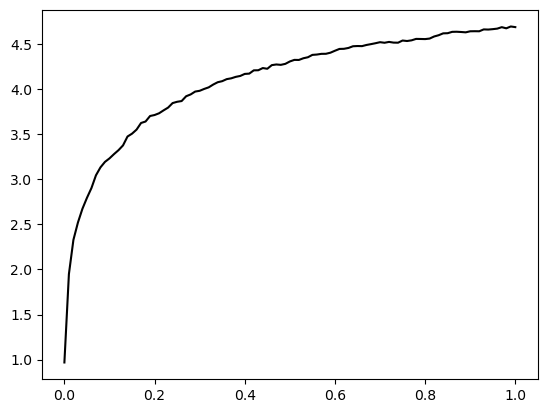

In [31]:
xvg.plot()

In [37]:
## Radius of gyration
!printf "1 0" | gmx gyrate -s md_0_1.tpr -f md_0_1_noPBC.xtc -o gyrate.xvg

                :-) GROMACS - gmx gyrate, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx gyrate -s md_0_1.tpr -f md_0_1_noPBC.xtc -o gyrate.xvg

Reading file md_0_1.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md_0_1.tpr, VERSION 2022.4-conda_forge (single precision)
Group     0 (         System) has 33876 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 elements
Group     6 (   MainChain+Cb) has   634 elements
Group     7 (    MainChain+H) has   646 elements
Group     8 (      SideChain) has  1314 elements
Group     9 (    SideChain-H) has   484 elements
Gro

<Axes: >

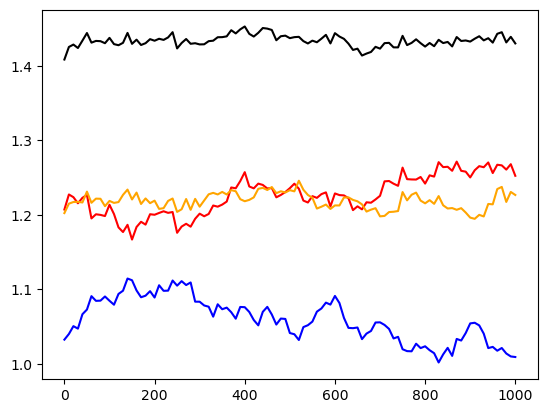

In [43]:
xvg1 = gromacs.formats.XVG("gyrate.xvg")
xvg1.plot()

In [48]:
## Radius of gyration
!printf "4 0" | gmx gyrate -s md_0_1.tpr -f md_0_1_noPBC.xtc -o gyrate2.xvg

                :-) GROMACS - gmx gyrate, 2022.4-conda_forge (-:

Executable:   /Users/arnab/opt/anaconda3/envs/molecularDynamics/bin.AVX2_256/gmx
Data prefix:  /Users/arnab/opt/anaconda3/envs/molecularDynamics
Working dir:  /Users/arnab/GitHub/molecular-dynamics/tutorials/lysozome-water
Command line:
  gmx gyrate -s md_0_1.tpr -f md_0_1_noPBC.xtc -o gyrate2.xvg

Reading file md_0_1.tpr, VERSION 2022.4-conda_forge (single precision)
Reading file md_0_1.tpr, VERSION 2022.4-conda_forge (single precision)
Group     0 (         System) has 33876 elements
Group     1 (        Protein) has  1960 elements
Group     2 (      Protein-H) has  1001 elements
Group     3 (        C-alpha) has   129 elements
Group     4 (       Backbone) has   387 elements
Group     5 (      MainChain) has   517 elements
Group     6 (   MainChain+Cb) has   634 elements
Group     7 (    MainChain+H) has   646 elements
Group     8 (      SideChain) has  1314 elements
Group     9 (    SideChain-H) has   484 elements
Gr

<Axes: >

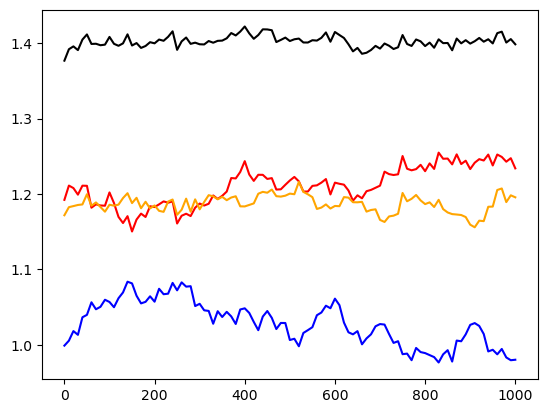

In [52]:
xvg2 = gromacs.formats.XVG("gyrate2.xvg")

xvg2.plot()

In [46]:
## Dump coordinates of atoms in different time steps
# !gmx trjconv -s md_0_1.tpr -f md_0_1.xtc -o test.gro -b 900 -e 1000 -tu fs -sep

In [47]:
!cat md.mdp

title                   = OPLS Lysozyme NPT equilibration
 ; Run parameters
integrator              = md        ; leap-frog integrator
nsteps                  = 500000    ; 2 * 500000 = 1000 ps (1 ns)
dt                      = 0.002     ; 2 fs
; Output control
nstxout                 = 0         ; suppress bulky .trr file by specifying 
nstvout                 = 0         ; 0 for output frequency of nstxout,
nstfout                 = 0         ; nstvout, and nstfout
nstenergy               = 5000      ; save energies every 10.0 ps
nstlog                  = 5000      ; update log file every 10.0 ps
nstxout-compressed      = 5000      ; save compressed coordinates every 10.0 ps
compressed-x-grps       = System    ; save the whole system
; Bond parameters
continuation            = yes       ; Restarting after NPT 
constraint_algorithm    = lincs     ; holonomic constraints 
constraints             = h-bonds   ; bonds involving H are constrained
lincs_iter              = 1         ; accura